This is based off of this Project:

1) provides the forward model of the imaging process.  Namely given a numerical phantom (“image”) of say the head), takes user provided field maps for the B0 magnet, and the gradients and RF coil and generates what the kspace of that object is expected to be.
2) Show the conventional FFT reconstruction of this modeled data and compare it to the ground truth object with some set of metrics (of distortion etc.)
3) Do an iterative reconstruction of the ground-truth object using the forward model to give a "best case” look at how this configuration of fields would image.  Note that if the fields render an ill-posed inverse problem, there will be residual aliasing and noise amplification.  Provide metrics of these.

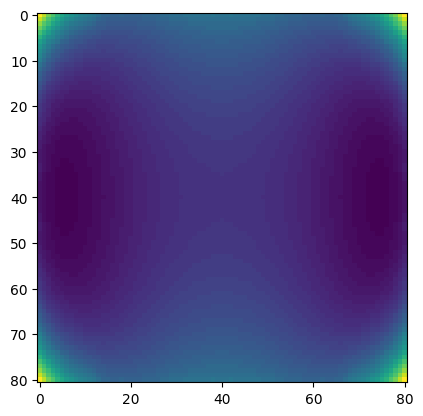

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

N_spins = 81  # Number of spins in each direction
# Create the phantom
phantom = np.ones((N_spins, N_spins), dtype=np.complex128)  # All spins start in equilibrium state


gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T

# Load the CSV B0 data into a NumPy array
B0 = np.genfromtxt('2Dslice.csv', delimiter=',')

# Calculate the Larmor frequency
gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
omega0 = B0 * gamma # Larmor frequency in Hz
h = 6.626e-34  # Planck's constant in Joules Hz e-1
h_bar = h/(2*np.pi)  # Reduced Planck's constant in Joules s
k = 1.380649e-23  # Boltzmann's constant in Joules K-1
T = 300  # Temperature in Kelvin

M0 = N_spins**2 * gamma**2 * h_bar**2 / (4 * k * T)

# Calculate the M0 field

# Plot the magnetic field
plt.imshow(B0)
plt.show()




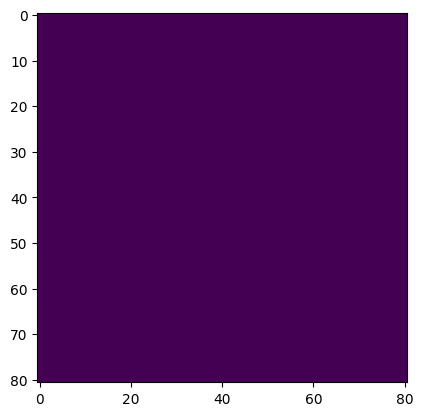

In [40]:
# Flip the spins
angle = np.pi / 2  # 90 degree flip
phantom *= np.exp(1j * angle)  # Rotate each spin by 90 degrees


# Plot the phantom
plt.imshow(np.abs(phantom))
plt.show()


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


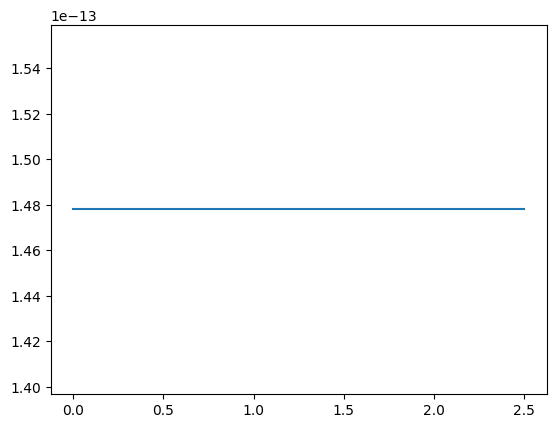

In [41]:

# The goal of this segment is to implement a FID that has an echo time and 

TE = 0.1  # Echo time in seconds
TR = 0.5  # Repetition time in seconds

# Calculate the time delay
time_delay = TR - TE

# Calculate the transverse signal
T1 = 1.0  # T1 relaxation time
T2 = 0.5  # T2 relaxation time

times = np.linspace(0, 5 * T2, 1000)  # Times at which to sample the signal
signal = np.zeros_like(times, dtype=np.complex128)

for i, t in enumerate(times):
    M1 = 1 - np.exp(-TE / T1)
    M2 = np.exp(-TR / T2)
    signal[i] = np.sum(phantom * M2)  # Signal is sum of all spins, with relaxation

# Plot the signal
plt.plot(times, signal)
plt.show()